<a href="https://colab.research.google.com/github/Piat0046/PractiseProject/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project1

#데이터셋 불러오기


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

df = pd.read_csv("/content/vgames2.csv") # df 데이터 저장
df = df.drop('Unnamed: 0', axis = 1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


##데이터 전처리

In [20]:
def trans(x): 
  a = df[x.str.contains('K')].index             # K를 포함한 셀 선택
  x.replace('K','', regex=True, inplace = True) # K 제거
  x.replace('M','', regex=True, inplace = True) # M 제거
  x = pd.to_numeric(x)                          # 형변환
  for j in a:                                   # K가 들어있던 행 단위변경
    x[j] = x[j] / 1000
  return x

df['NA_Sales'] = trans(df['NA_Sales'])         
df['EU_Sales'] = trans(df['EU_Sales'])
df['JP_Sales'] = trans(df['JP_Sales'])
df['Other_Sales'] = trans(df['Other_Sales'])
df.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [21]:
df['Total'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales'] #total 추가

a = df[(df['Year'] < 100) & (df['Year'] >= 80)].index
for j in a:                                   # K가 들어있던 행 단위변경
  df['Year'][j] = df['Year'][j]+1900

a = df[(df['Year'] < 20) & (df['Year'] >= 0)].index
for j in a:                                   # K가 들어있던 행 단위변경
  df['Year'][j] = df['Year'][j]+2000

df['Year'] = df['Year'].fillna(0)                      #결측치 0으로 대체
#df['Genre'] = df['Genre'].fillna('None')               #결측치 None으로 대체
df['Genre'] = df['Genre'].dropna()
df['Publisher'] = df['Publisher'].fillna('None')       #결측치 None으로 대체

df = df.reset_index(drop=True)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


## 지역별 장르 선호도
각 지역별 장르 선호도를 구하고, 시각화

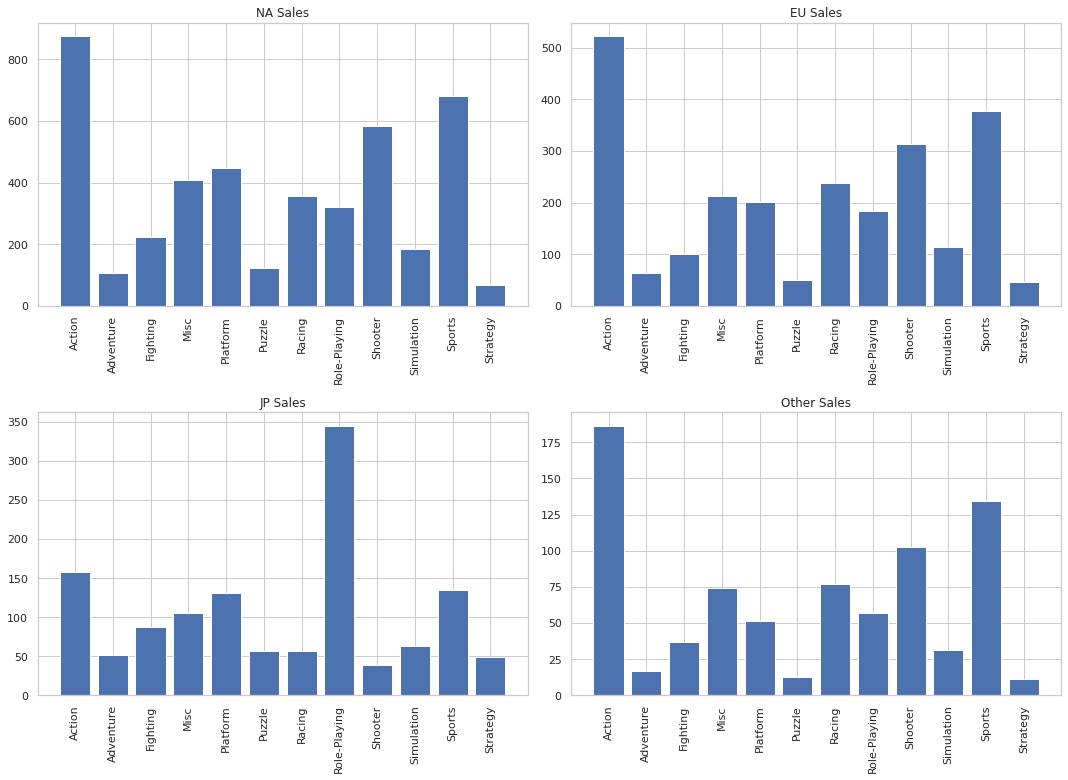

In [135]:
import matplotlib.pyplot as plt
country = np.array(['NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales']) #지역별 array 생성

genre = pd.DataFrame([])  # 장르 데이터 프레임 생성

for i in country:                             #장르별 총합
  genre[i] = df[i].groupby(df['Genre']).sum() 

ax = plt.subplot # 그래프 선언
plt.figure(figsize=(15,11)) #그래프 크기 설정
ax(221).bar(genre['NA_Sales'].index,genre['NA_Sales']); # 그래프 정의
plt.xticks(rotation = 90) #x축 레이블 회전
plt.title('NA Sales') # 제목 설정
ax(222).bar(genre['EU_Sales'].index,genre['EU_Sales']);
plt.xticks(rotation = 90)
plt.title('EU Sales')
ax(223).bar(genre['JP_Sales'].index,genre['JP_Sales']);
plt.xticks(rotation = 90)
plt.title('JP Sales')
ax(224).bar(genre['Other_Sales'].index,genre['Other_Sales']);
plt.xticks(rotation = 90)
plt.title('Other Sales')
plt.tight_layout() # 그래프간 간격조정
plt.show()


###장르별 출고량의 평균

In [105]:
genre2

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.264693,0.157991,0.047776,0.056415
Adventure,0.082547,0.050039,0.040586,0.013133
Fighting,0.263518,0.119504,0.103117,0.043259
Misc,0.235323,0.122468,0.060709,0.042699
Platform,0.505023,0.228066,0.147794,0.058292
Puzzle,0.213408,0.087768,0.098391,0.021661
Racing,0.287361,0.190748,0.045374,0.062027
Role-Playing,0.215469,0.123790,0.232603,0.038409
Shooter,0.444893,0.239335,0.029266,0.078479


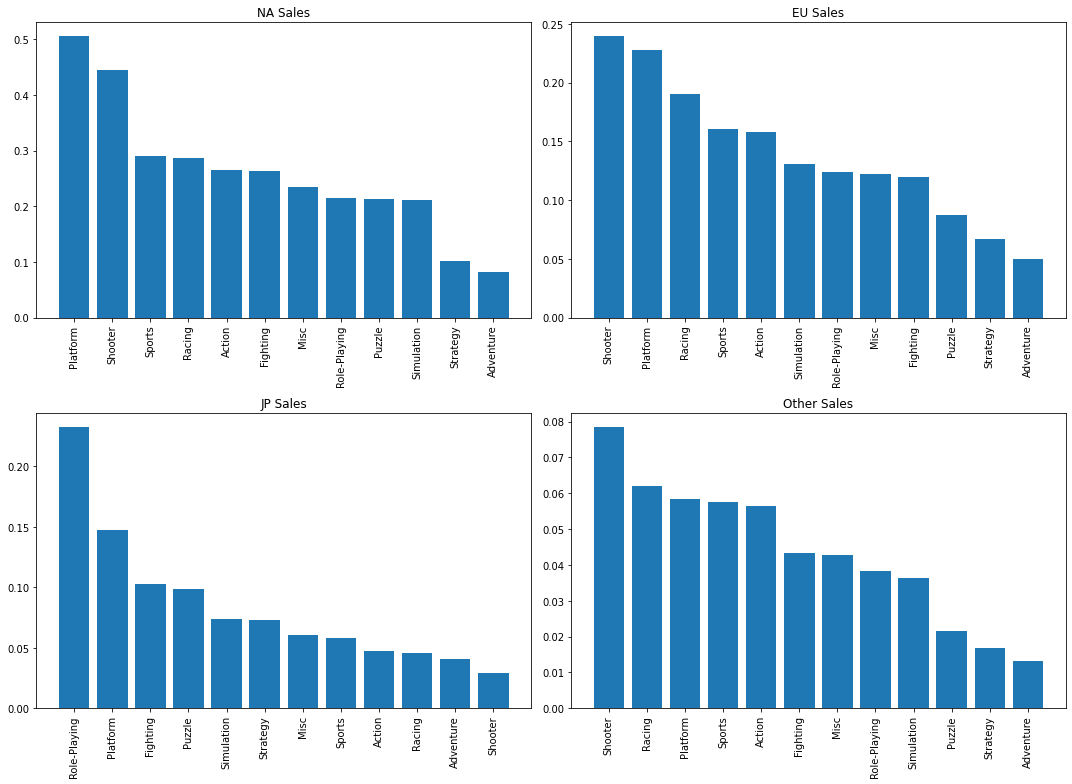

In [23]:
genre2 = pd.DataFrame([])  # 장르 평균 데이터 프레임 생성

for i in country:                             #장르별 총합
  genre2[i] = df[i].groupby(df['Genre']).mean() 
  
ax2 = plt.subplot # 그래프 선언
plt.figure(figsize=(15,11)) #그래프 크기 설정
ax2(221).bar(genre2['NA_Sales'].sort_values(ascending=False).index,genre2['NA_Sales'].sort_values(ascending=False)); # 그래프 정의
plt.xticks(rotation = 90) #x축 레이블 회전
plt.title('NA Sales') # 제목 설정
ax2(222).bar(genre2['EU_Sales'].sort_values(ascending=False).index,genre2['EU_Sales'].sort_values(ascending=False));
plt.xticks(rotation = 90)
plt.title('EU Sales')
ax2(223).bar(genre2['JP_Sales'].sort_values(ascending=False).index,genre2['JP_Sales'].sort_values(ascending=False));
plt.xticks(rotation = 90)
plt.title('JP Sales')
ax2(224).bar(genre2['Other_Sales'].sort_values(ascending=False).index,genre2['Other_Sales'].sort_values(ascending=False));
plt.xticks(rotation = 90)
plt.title('Other Sales')
plt.tight_layout() # 그래프간 간격조정
plt.show()

 ### 1995~2016년도 연도별 트렌드 확인
 

일본을 제외

In [24]:
df3 = df.drop('JP_Sales', axis = 1)                                 # 일본을 제외한 데이터 선언 
df3['Total'] = df3['NA_Sales']+df3['EU_Sales']+df3['Other_Sales']   # 데이터의 합

각 년도별 매출액이 높은 100개의 게임

In [76]:
d = pd.DataFrame(columns=df3.columns) # 1995~2016년도 까지의 년도 
for i in range(1995,2016):         
  b = df3[df3['Year'] == i]
  d = d.append(b.sort_values('Total', ascending=False).head(50))
d

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Other_Sales,Total
4789,Warcraft II: Tides of Darkness,PC,1995.0,Strategy,Activision,1.70,2.27,0.23,4.20
12397,Namco Museum Vol.1,PS,1995.0,Misc,Sony Computer Entertainment,2.12,1.44,0.06,3.62
14152,Killer Instinct,SNES,1995.0,Fighting,Nintendo,2.26,0.72,0.10,3.08
12926,Rayman,PS,1995.0,Platform,Ubisoft,1.54,1.33,0.16,3.03
2173,Donkey Kong Country 2: Diddy's Kong Quest,SNES,1995.0,Platform,Nintendo,2.10,0.74,0.11,2.95
...,...,...,...,...,...,...,...,...,...
14993,The Elder Scrolls Online,XOne,2015.0,Role-Playing,Bethesda Softworks,0.77,0.38,0.12,1.27
16290,The Witcher 3: Wild Hunt,XOne,2015.0,Role-Playing,Namco Bandai Games,0.66,0.47,0.11,1.24
146,Fallout 4,PC,2015.0,Role-Playing,Bethesda Softworks,0.50,0.63,0.10,1.23
8153,Just Dance 2016,Wii,2015.0,Misc,Ubisoft,0.52,0.59,0.10,1.21


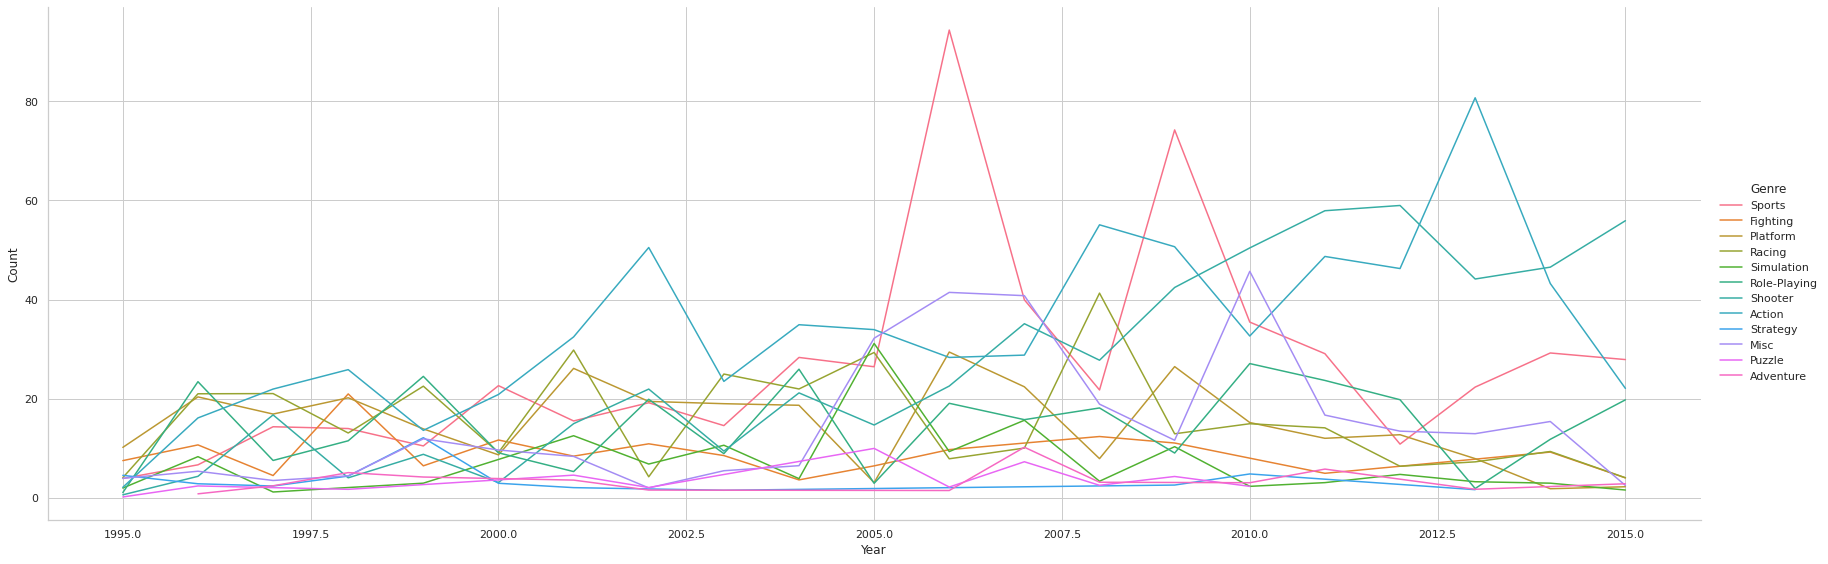

In [77]:
colunms = ['Year', 'Genre', 'Count']
line = pd.DataFrame(columns=colunms)

for i in range(1995,2016):         # 1980~2017년도 까지의 년도,장르별 판매평균액
  b = d[d['Year'] == i]
  for c in b.Genre.value_counts().index: 
    line = line.append({'Year' : i, 'Genre' : c, 'Count' : b[b['Genre'] == c]['Total'].sort_values(ascending=False).sum()},ignore_index=True) # 장르별 판매장수가 높은 5종류의 게임의 평균 
                          # i = 년도    c = 장르
 
sns.relplot(data=line, x="Year", y="Count", hue="Genre", 
                                                        kind="line", 
                                                        height=8, 
                                                        aspect=3); # 그래프 시각화



In [104]:
pv1 = pd.crosstab(d.Genre, d.Year) # 년도와 장르의 상관관계 표시
pv1 = chi2_contingency(pv1)
pv1[1]

0.0001783007791975108

In [71]:
line[line['Year'] == 2006]

,Year,Genre,Count
127,2006,Racing,23.68
128,2006,Action,35.87
129,2006,Shooter,28.99
130,2006,Sports,100.93
131,2006,Misc,46.94
132,2006,Fighting,12.26
133,2006,Role-Playing,22.89
134,2006,Platform,32.50
135,2006,Simulation,10.38
136,2006,Adventure,3.65


##**일본을 제외한 2010년 이후의 데이터**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


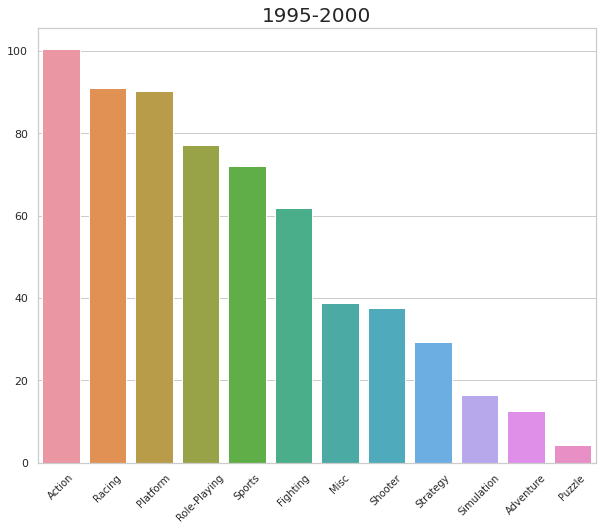

In [92]:
colunms = ['Year', 'Genre', 'Count']
line2 = pd.DataFrame(columns=colunms)

for i in range(1995,2001):         # 1980~2017년도 까지의 년도,장르별 판매평균액
  b = d[d['Year'] == i]
  for c in b.Genre.value_counts().index: 
    line2 = line2.append({'Year' : i, 'Genre' : c, 'Count' : b[b['Genre'] == c]['Total'].sort_values(ascending=False).sum()},ignore_index=True) # 장르별 판매장수가 높은 5종류의 게임의 평균 
                          # i = 년도    c = 장르

trand_sum2010 = pd.DataFrame(line2['Count'].groupby(line2['Genre']).sum().sort_values(ascending = False)).reset_index()
plt.figure(figsize=(10,8))
p = sns.barplot('Genre', 'Count', data = trand_sum2010)
p.set_title("1995-2000", fontsize=20)
p.set_xlabel("")
p.set_ylabel("") 
plt.xticks(fontsize=10, rotation=45);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


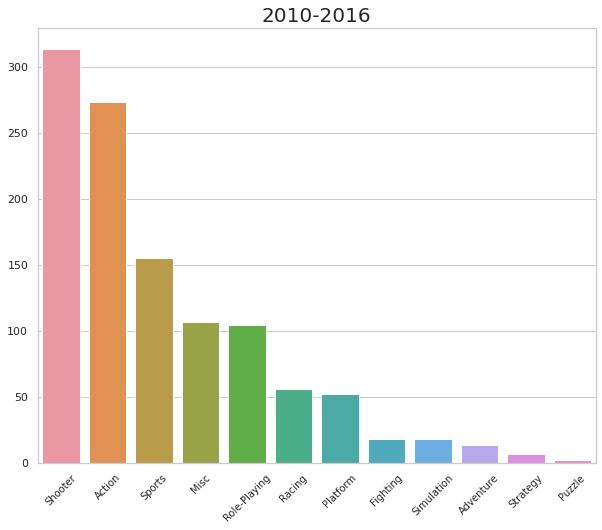

In [98]:
colunms = ['Year', 'Genre', 'Count']
line2 = pd.DataFrame(columns=colunms)

for i in range(2010,2016):         # 1980~2017년도 까지의 년도,장르별 판매평균액
  b = d[d['Year'] == i]
  for c in b.Genre.value_counts().index: 
    line2 = line2.append({'Year' : i, 'Genre' : c, 'Count' : b[b['Genre'] == c]['Total'].sort_values(ascending=False).sum()},ignore_index=True) # 장르별 판매장수가 높은 5종류의 게임의 평균 
                          # i = 년도    c = 장르

trand_sum2010 = pd.DataFrame(line2['Count'].groupby(line2['Genre']).sum().sort_values(ascending = False)).reset_index()

plt.figure(figsize=(10,8))
p = sns.barplot('Genre', 'Count', data = trand_sum2010)

p.set_title("2010-2016", fontsize=20)
p.set_xlabel("")
p.set_ylabel("") 
plt.xticks(fontsize=10, rotation=45);
plt.show()

평균치로 보아 2010~ 2015년의 트렌드는 액션과 슈터의 장르로 보인다.
출시작은 액션이 압도적으로 많았으나, 평균 흥행성적에는 액셕과 슈터가 비슷하였고,
경쟁사가 상대적으로 적은 슈터가 개발방향으로 좋아보인다.

단, 2016이후의 데이터가 부족하여 현재2020년까지의 트렌드로 보기에는 다소 어려울수 있음

### 흥행성적이 높은 게임에 대한 분석
2010년부터 2017년 사이의 흥행성적이 높은 게임에 대한 분석
각 년도별 3종목씩 뽑아 분석하였다.

In [ ]:
c = df[df['Year'] == 2005].sort_values(by = 'Total', ascending=False).head(3)
for i in range(2006,2017):         
  b = df[df['Year'] == i].sort_values(by = 'Total', ascending=False).head(3).reset_index(drop = True)
  if b['Name'][0] == b['Name'][1]:                                                                   # 동일한 이름의 게임이 있을 경우 플랫폼과 판매금액을 합침
    b['Platform'][0] = b['Platform'][0]+b['Platform'][1]
    b['NA_Sales'][0] = b['NA_Sales'][0]+b['NA_Sales'][1]
    b['EU_Sales'][0] = b['EU_Sales'][0]+b['EU_Sales'][1]
    b['JP_Sales'][0] = b['JP_Sales'][0]+b['JP_Sales'][1]
    b['Other_Sales'][0] = b['Other_Sales'][0]+b['Other_Sales'][1]
    b.drop(1, inplace = True)
    b = b.append(df[df['Year'] == i].sort_values(by = 'Total', ascending=False).head(4).reset_index(drop = True).tail(1)).reset_index(drop = True)
  elif (b['Name'][0] == b['Name'][2]):
    b['Platform'][0] = b['Platform'][0]+b['Platform'][2]
    b['NA_Sales'][0] = b['NA_Sales'][0]+b['NA_Sales'][2]
    b['EU_Sales'][0] = b['EU_Sales'][0]+b['EU_Sales'][2]
    b['JP_Sales'][0] = b['JP_Sales'][0]+b['JP_Sales'][2]
    b['Other_Sales'][0] = b['Other_Sales'][0]+b['Other_Sales'][2]
    b.drop(2, inplace = True)
    b = b.append(df[df['Year'] == i].sort_values(by = 'Total', ascending=False).head(4).reset_index(drop = True).tail(1)).reset_index(drop = True)
  elif (b['Name'][1] == b['Name'][2]):
    b['Platform'][1] = b['Platform'][1]+b['Platform'][2]
    b['NA_Sales'][1] = b['NA_Sales'][1]+b['NA_Sales'][2]
    b['EU_Sales'][1] = b['EU_Sales'][1]+b['EU_Sales'][2]
    b['JP_Sales'][1] = b['JP_Sales'][1]+b['JP_Sales'][2]
    b['Other_Sales'][1] = b['Other_Sales'][1]+b['Other_Sales'][2]
    b.drop(2, inplace = True)
    b = b.append(df[df['Year'] == i].sort_values(by = 'Total', ascending=False).head(4).reset_index(drop = True).tail(1)).reset_index(drop = True)
  c = pd.merge(c,b, how='outer')

##타겟지역의 출고량이 높은 순위

In [33]:
Sales_data = df3.sort_values(by = 'Total', ascending=False).head(40) #일본을 제외한 지역의 토탈
Sales_data = Sales_data.reset_index(drop = True)
Sales_data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Other_Sales,Total
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,8.46,78.97
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,0.77,33.43
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.31,32.04
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,2.96,29.72
4,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.47,28.03
5,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.85,26.08
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,0.58,26.04
7,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,2.26,23.91
8,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,2.90,23.51
9,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,2.75,22.82


In [34]:
#ax1 = plt.subplot # 그래프 선언
#plt.figure(figsize=(10,15)) #그래프 크기 설정
#ax1(221).bar(Sales_data['Name'], Sales_data['NA_Sales']); # 그래프 정의
#plt.xticks(rotation = 90) #x축 레이블 회전
#plt.title('NA Sales') # 제목 설정
#ax1(222).bar(Sales_data['Name'], Sales_data['EU_Sales']);
#plt.xticks(rotation = 90)
#plt.title('EU Sales')
#ax1(223).bar(Sales_data['Name'], Sales_data['JP_Sales']);
#plt.xticks(rotation = 90)
#plt.title('JP Sales')
#ax1(224).bar(Sales_data['Name'], Sales_data['Other_Sales']);
#plt.xticks(rotation = 90)
#plt.title('Other Sales')
#plt.tight_layout() # 그래프간 간격조정
#plt.show()

In [35]:
Sales_data2 = pd.DataFrame({'Publisher' : Sales_data['Publisher'].value_counts().index}, columns= ['Publisher', 'Total'])
Sales_data2 = Sales_data2.fillna(0)

for i in range(0,len(Sales_data.index)):                                                                      #공급사별 출고량의 총합
  if Sales_data2.loc[0, 'Publisher'] == Sales_data.loc[i, 'Publisher']:
    Sales_data2.loc[0, 'Total'] = Sales_data2.loc[0, 'Total'] + Sales_data.loc[i, 'Total']
  elif Sales_data2.loc[1, 'Publisher'] == Sales_data.loc[i, 'Publisher']:
    Sales_data2.loc[1, 'Total'] = Sales_data2.loc[1, 'Total'] + Sales_data.loc[i, 'Total']
  elif Sales_data2.loc[2, 'Publisher'] == Sales_data.loc[i, 'Publisher']:
    Sales_data2.loc[2, 'Total'] = Sales_data2.loc[2, 'Total'] + Sales_data.loc[i, 'Total']
  elif Sales_data2.loc[3, 'Publisher'] == Sales_data.loc[i, 'Publisher']:
    Sales_data2.loc[3, 'Total'] = Sales_data2.loc[3, 'Total'] + Sales_data.loc[i, 'Total']
  elif Sales_data2.loc[4, 'Publisher'] == Sales_data.loc[i, 'Publisher']:
    Sales_data2.loc[4, 'Total'] = Sales_data2.loc[4, 'Total'] + Sales_data.loc[i, 'Total']

Sales_data2 = Sales_data2.sort_values(by = 'Total', ascending=False)

Sales_data2

,Publisher,Total
0,Nintendo,503.86
1,Activision,108.78
2,Take-Two Interactive,108.14
3,Microsoft Game Studios,33.59
4,Sony Computer Entertainment,23.65


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

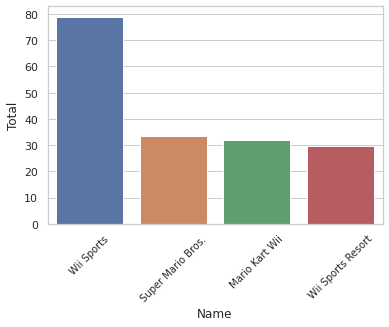

In [36]:
sns.set_theme(style="whitegrid")
sns.barplot('Name', 'Total', data = Sales_data.head(4))
plt.xticks(fontsize=10, rotation=45)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

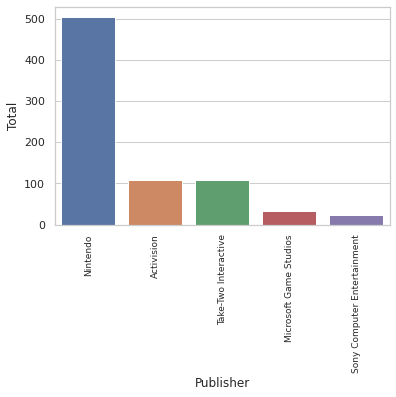

In [37]:
sns.set_theme(style="whitegrid")
sns.barplot('Publisher', 'Total', data = Sales_data2)
plt.xticks(fontsize=9, rotation=90)

##장르별 개발 플랫폼

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

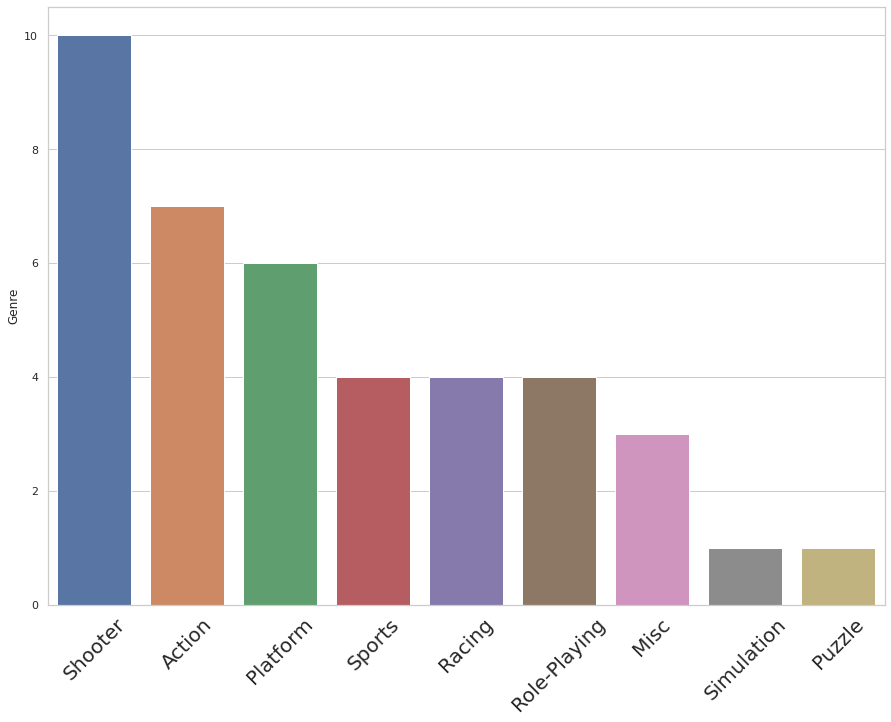

In [38]:
gn_count = pd.DataFrame(Sales_data['Genre'].value_counts()) # 최고출고량의 장르별 데이터

plt.figure(figsize=(15,11))
sns.barplot(gn_count.index, 'Genre', data = gn_count)
plt.xticks(fontsize=20, rotation=45)

중복되는 게임 제거

In [39]:
df4 = df3[df3['Year'] >= 2010].reset_index(drop=True)
Sales_data4 = df4.sort_values(by = 'Total', ascending=False).head(80)    
Sales_data4 = Sales_data4.reset_index(drop = True)

def trans2(x): 
  x.replace('II','2', regex=True, inplace = True) # II를 2으로 변환
  x.replace('III','3', regex=True, inplace = True) # III를 3으로 변화
  return x

Sales_data4['Name'] = trans2(Sales_data4['Name']) # ii 또는 iii 2,3로 변환

for i in range(0,len(Sales_data4)):
  for b in range(0,len(Sales_data4)):
    if (Sales_data4.loc[i,'Name'] == Sales_data4.loc[(b),'Name']) and (i != b):        # 만약 i와b의 값이 같지 않고, i행의 이름이 b행의 이름과 같다면
      Sales_data4.loc[i,'Platform'] = Sales_data4.loc[i,'Platform'] + Sales_data4.loc[b,'Platform'] # 플랫폼 통일
      if Sales_data4.loc[i,'Year'] >= Sales_data4.loc[b,'Year']:   # 년도 중 먼저 나온 년도로 저장
        Sales_data4.loc[i,'Year'] =Sales_data4.loc[b,'Year'] 
      Sales_data4.loc[i,'Total'] = Sales_data4.loc[i,'Total'] + Sales_data4.loc[b,'Total'] # 출고량 합
      Sales_data4.loc[b,'Name'] = None    #중복된 데이터 중 하위 데이터 결측치로 변환
Sales_data4 = Sales_data4.dropna() # 결측치 제거
Sales_data4 = Sales_data4.drop('NA_Sales',axis = 1)
Sales_data4 = Sales_data4.drop('EU_Sales',axis = 1)
Sales_data4 = Sales_data4.drop('Other_Sales',axis = 1)
Sales_data4 = Sales_data4.sort_values(by = 'Total', ascending=False) #출고량이 높은순 정렬
Sales_data4 = Sales_data4.reset_index(drop= True) #인덱스 초기화
Sales_data4 = Sales_data4.head(40)
Sales_data4

,Name,Platform,Year,Genre,Publisher,Total
0,Grand Theft Auto V,PS3X360PS4XOne,2013.0,Action,Take-Two Interactive,53.45
1,Call of Duty: Modern Warfare 3,X360PS3,2011.0,Shooter,Activision,27.61
2,Call of Duty: Black Ops 2,X360PS3,2012.0,Shooter,Activision,27.06
3,Call of Duty: Black Ops,X360PS3,2010.0,Shooter,Activision,26.78
4,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,21.58
5,Call of Duty: Black Ops 3,PS4XOne,2015.0,Shooter,Activision,21.17
6,Call of Duty: Advanced Warfare,PS4XOneX360PS3,2014.0,Shooter,Activision,21.14
7,Call of Duty: Ghosts,X360PS3,2013.0,Shooter,Activision,19.37
8,The Elder Scrolls V: Skyrim,X360PS3,2011.0,Role-Playing,Bethesda Softworks,15.05
9,Minecraft,X360PS3,2013.0,Misc,Microsoft Game Studios,14.60


In [100]:
Sales_data2 = pd.DataFrame({'Genre' : Sales_data4['Genre'].value_counts().index}, columns= ['Genre', 'Total'])
Sales_data2 = Sales_data2.fillna(0)

for i in range(0,len(Sales_data4.index)):                                                                      #공급사별 출고량의 총합
  if Sales_data2.loc[0, 'Genre'] == Sales_data4.loc[i, 'Genre']:
    Sales_data2.loc[0, 'Total'] = Sales_data2.loc[0, 'Total'] + Sales_data4.loc[i, 'Total']
  elif Sales_data2.loc[1, 'Genre'] == Sales_data4.loc[i, 'Genre']:
    Sales_data2.loc[1, 'Total'] = Sales_data2.loc[1, 'Total'] + Sales_data4.loc[i, 'Total']
  elif Sales_data2.loc[2, 'Genre'] == Sales_data4.loc[i, 'Genre']:
    Sales_data2.loc[2, 'Total'] = Sales_data2.loc[2, 'Total'] + Sales_data4.loc[i, 'Total']
  elif Sales_data2.loc[3, 'Genre'] == Sales_data4.loc[i, 'Genre']:
    Sales_data2.loc[3, 'Total'] = Sales_data2.loc[3, 'Total'] + Sales_data4.loc[i, 'Total']
  elif Sales_data2.loc[4, 'Genre'] == Sales_data4.loc[i, 'Genre']:
    Sales_data2.loc[4, 'Total'] = Sales_data2.loc[4, 'Total'] + Sales_data4.loc[i, 'Total']
  elif Sales_data2.loc[5, 'Genre'] == Sales_data4.loc[i, 'Genre']:
    Sales_data2.loc[5, 'Total'] = Sales_data2.loc[5, 'Total'] + Sales_data4.loc[i, 'Total']
  elif Sales_data2.loc[6, 'Genre'] == Sales_data4.loc[i, 'Genre']:
    Sales_data2.loc[6, 'Total'] = Sales_data2.loc[6, 'Total'] + Sales_data4.loc[i, 'Total']
  elif Sales_data2.loc[7, 'Genre'] == Sales_data4.loc[i, 'Genre']:
    Sales_data2.loc[7, 'Total'] = Sales_data2.loc[7, 'Total'] + Sales_data4.loc[i, 'Total']

Sales_data2# = Sales_data2.sort_values(by = 'Total', ascending=False)



,Genre,Total
0,Shooter,190.41
1,Action,117.92
2,Sports,54.66
3,Misc,62.87
4,Role-Playing,39.69
5,Platform,22.74
6,Racing,25.19
7,Fighting,9.24


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text major ticklabel objects>)

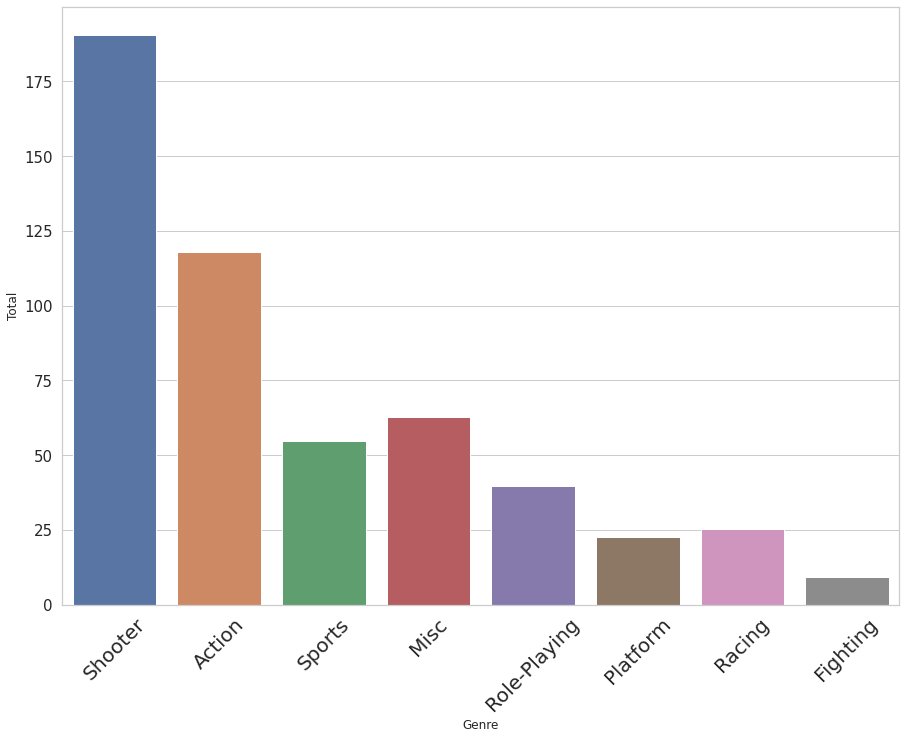

In [99]:
plt.figure(figsize=(15,11))
sns.barplot('Genre', 'Total', data = Sales_data2)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text major ticklabel objects>)

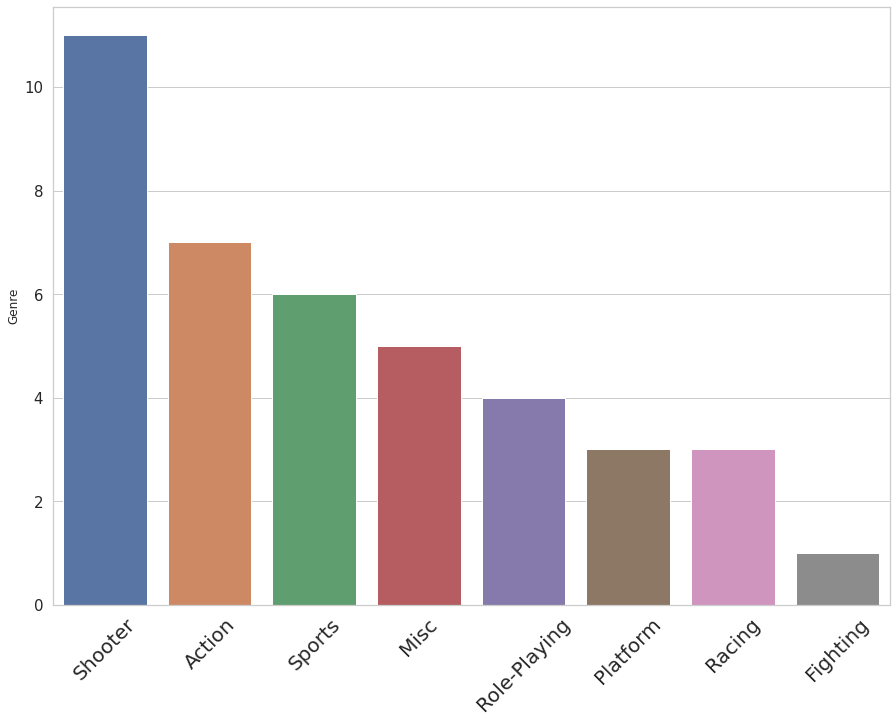

In [42]:
gn_count3 = pd.DataFrame(Sales_data4['Genre'].value_counts()) # 최고출고량의 장르별 데이터
plt.figure(figsize=(15,11))
sns.barplot(gn_count3.index, 'Genre', data = gn_count3)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text major ticklabel objects>)

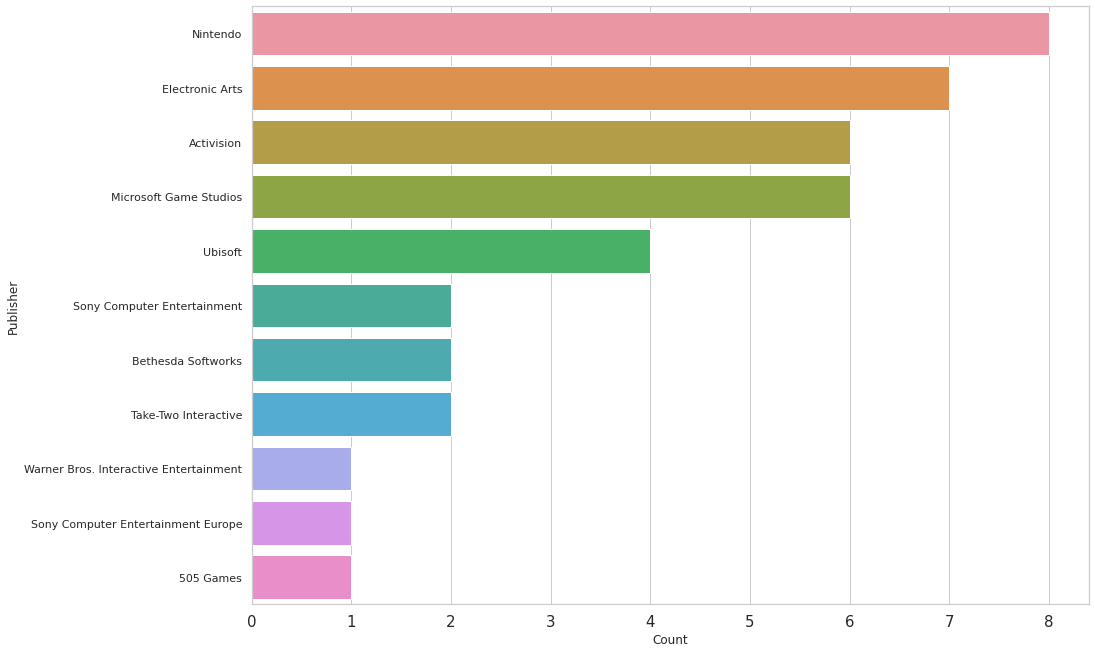

In [44]:
Pub2 = pd.DataFrame(Sales_data4['Publisher'].value_counts()).reset_index()
Pub2.rename(columns={'index' : 'Publisher', 'Publisher' : 'Count'}, inplace = True)
plt.figure(figsize=(15,11))
sns.barplot(Pub2.Count, Pub2.Publisher, data = Pub2)
plt.xticks(fontsize=15, rotation=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


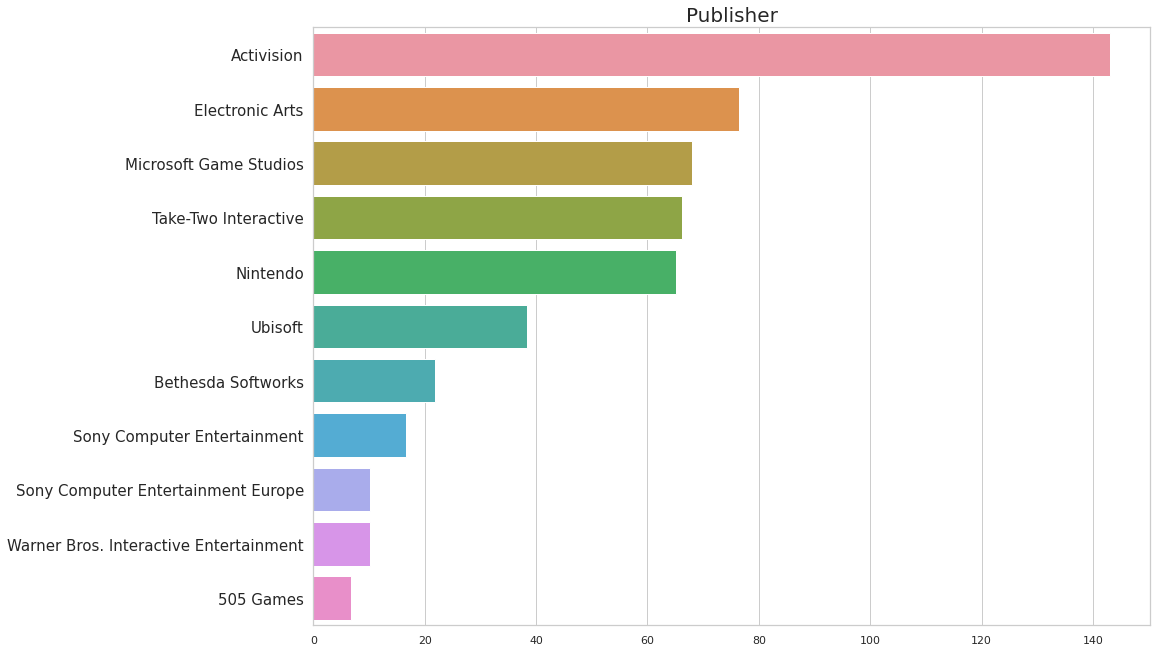

In [146]:
Pub3 = pd.DataFrame(Sales_data4['Total'].groupby(Sales_data4['Publisher']).sum()).sort_values(by = 'Total' ,ascending=False)

plt.figure(figsize=(15,11))
p = sns.barplot(Pub3.Total, Pub3.index, data = Pub3)
p.set_title("Publisher", fontsize=20)
p.set_xlabel("")
p.set_ylabel("") 
plt.yticks(fontsize=15, rotation=0);
plt.show()

Nintendo                                  0.200
Electronic Arts                           0.175
Activision                                0.150
Microsoft Game Studios                    0.150
Ubisoft                                   0.100
Sony Computer Entertainment               0.050
Bethesda Softworks                        0.050
Take-Two Interactive                      0.050
Warner Bros. Interactive Entertainment    0.025
Sony Computer Entertainment Europe        0.025
505 Games                                 0.025
Name: Publisher, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <a list of 8 Text major ticklabel objects>)

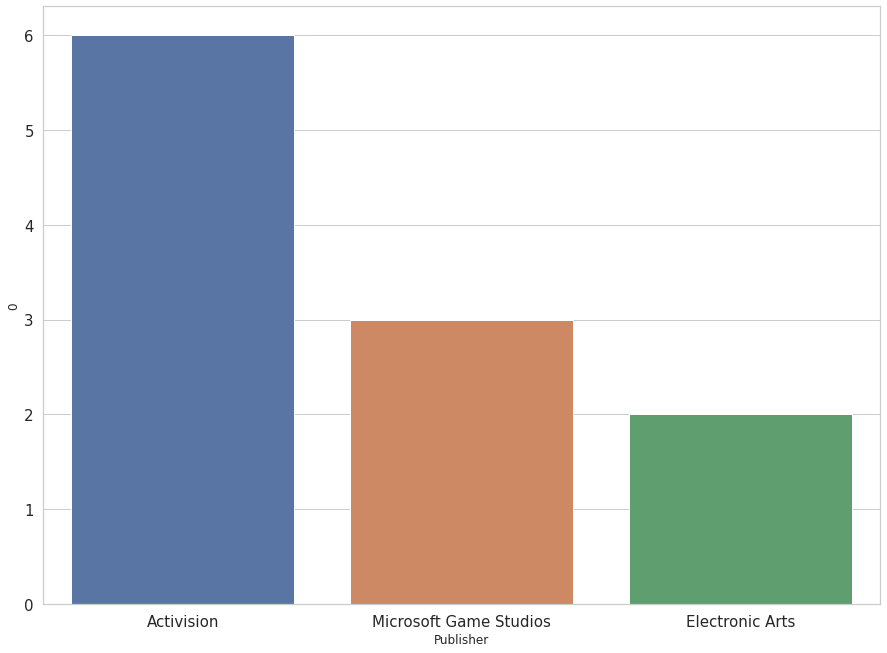

In [143]:
df6 = pd.DataFrame(Sales_data4[Sales_data4['Genre'] == 'Shooter'].value_counts('Publisher'))

plt.figure(figsize=(15,11))
sns.barplot(df6.index, 0, data = df6)
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


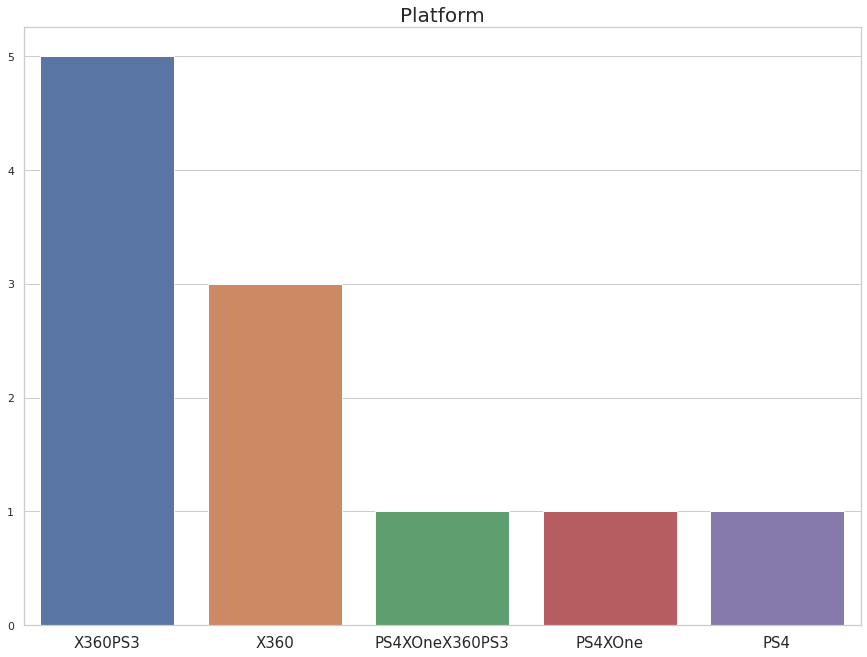

In [144]:
df8 = pd.DataFrame(Sales_data4[Sales_data4['Genre'] == 'Shooter'].value_counts('Platform'))

plt.figure(figsize=(15,11))
p = sns.barplot(df8.index, 0, data = df8)
p.set_title("Platform", fontsize=20)
p.set_xlabel("")
p.set_ylabel("") 
plt.xticks(fontsize=15, rotation=0);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


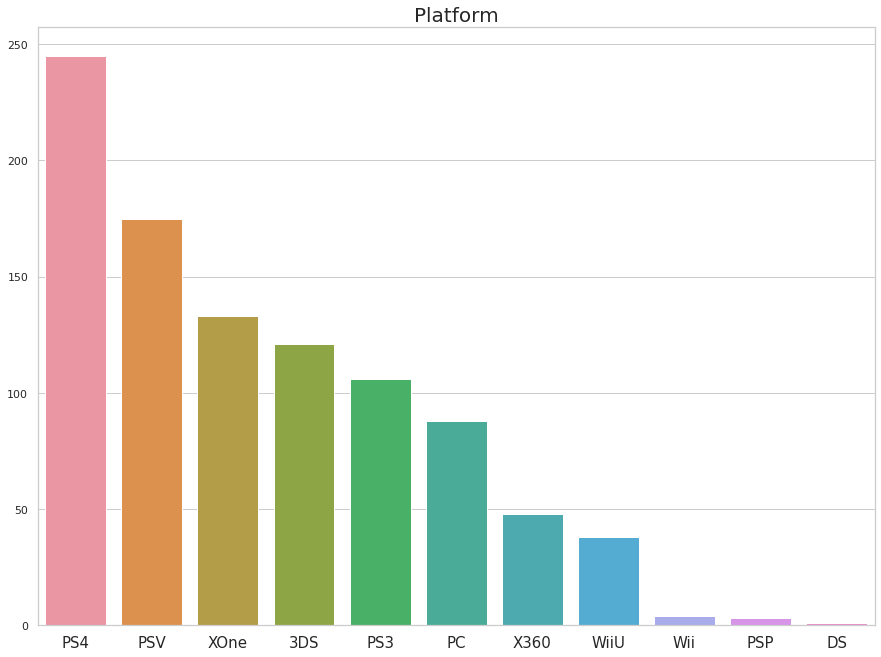

In [174]:
df9 = df3[df3['Year'] >= 2015].reset_index(drop=True)
df10 = pd.DataFrame((df9['Platform'].value_counts()))

plt.figure(figsize=(15,11))
p = sns.barplot(df10.index, 'Platform', data = df10)
p.set_title("Platform", fontsize=20)
p.set_xlabel("")
p.set_ylabel("") 
plt.xticks(fontsize=15, rotation=0);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


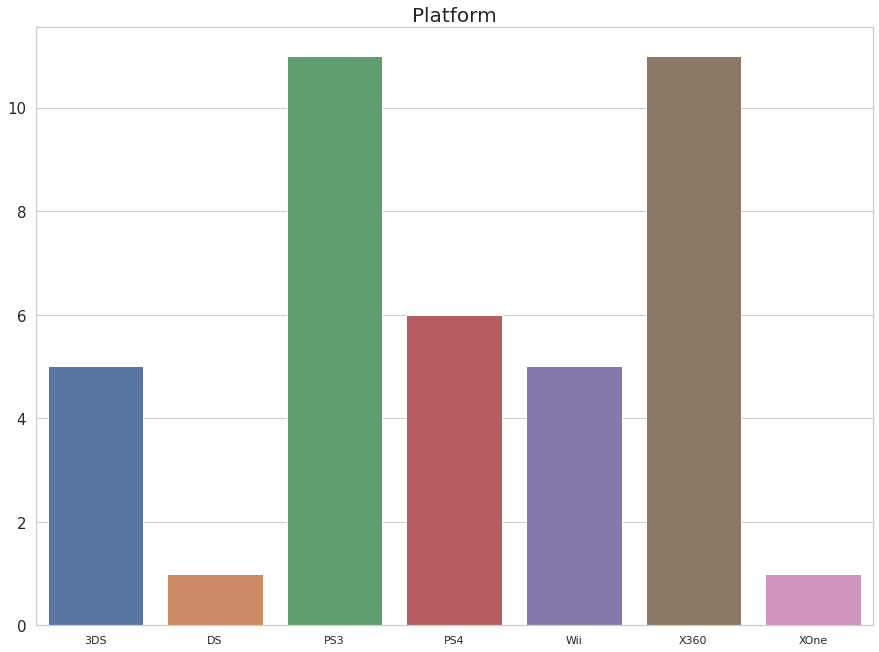

In [167]:
df4 = df3[df3['Year'] >= 2010].reset_index(drop=True)
Sales_data5 = df4.sort_values(by = 'Total', ascending=False).head(40)    
Sales_data5 = Sales_data5.reset_index(drop = True)
df7 = pd.DataFrame(Sales_data5.groupby(Sales_data5['Platform']).size())

plt.figure(figsize=(15,11))
p = sns.barplot(df7.index, 0, data = df7)
p.set_title("Platform", fontsize=20)
p.set_xlabel("")
p.set_ylabel("") 
plt.yticks(fontsize=15, rotation=0);
plt.show()

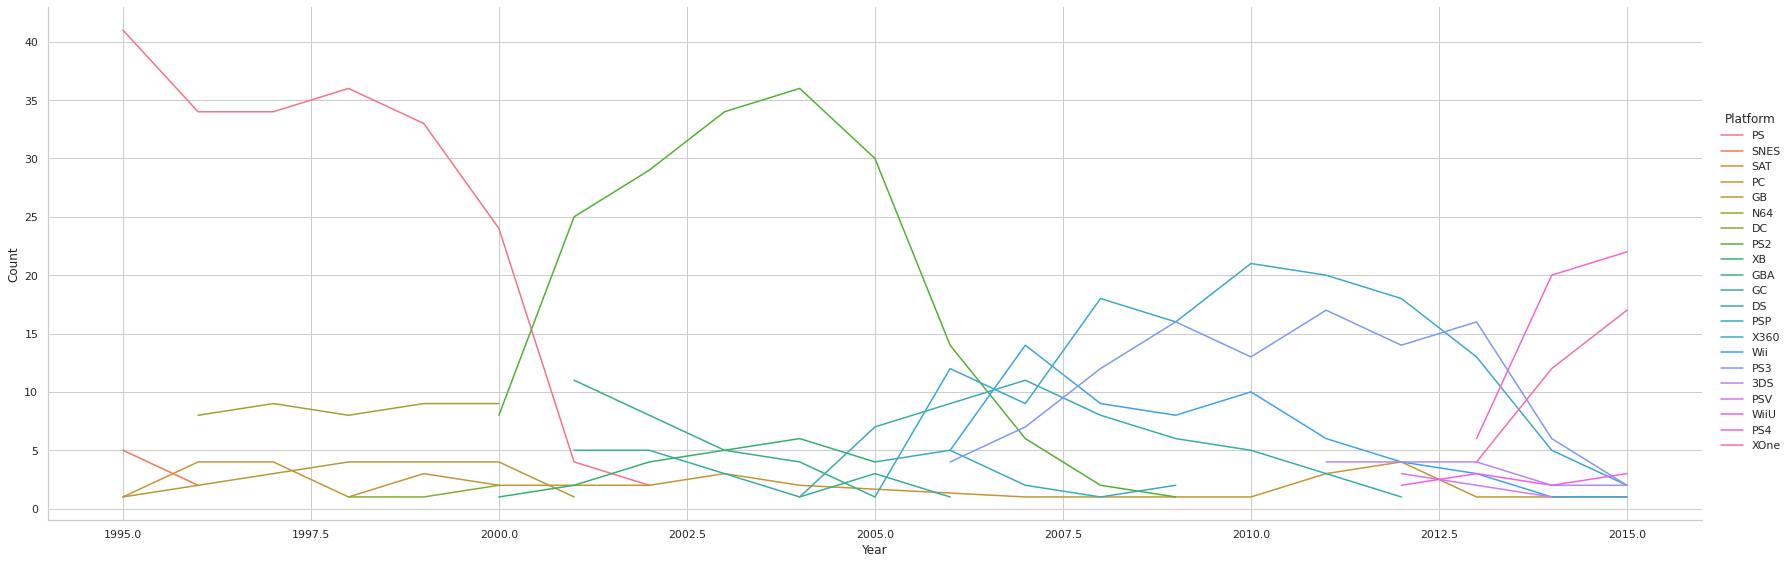

In [177]:
colunms = ['Year', 'Platform', 'Count']
line = pd.DataFrame(columns=colunms)

for i in range(1995,2016):         # 1980~2017년도 까지의 년도,장르별 판매평균액
  b = d[d['Year'] == i]
  for c in b.Platform.value_counts().index: 
    line = line.append({'Year' : i, 'Platform' : c, 'Count' : len(b[b['Platform'] == c])},ignore_index=True) # 장르별 판매장수가 높은 5종류의 게임의 평균 
                          # i = 년도    c = 장르
 
sns.relplot(data=line, x="Year", y="Count", hue="Platform", 
                                                        kind="line", 
                                                        height=8, 
                                                        aspect=3); # 그래프 시각화